
**Data Science Challenge: Card Transactions!**



In the following cell we import all the python packages we are going to need for our analysis. 
It is better to have them organized in the first cell.

**Requirements**

In [193]:
# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd

from datetime import datetime

# =====================================
# scikit-learn and imbalanced-learn

# Preprocessing etc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Classifiers




# =====================================
# Matplotlib, seaborn etc 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

# Define Capital One colors 
cap1_blue ='#004879'
cap1_red = '#D22E1E'
# ======================================




# Question: Load
**Load and simple preprocessing**

In the first part we load the data and perform some basic data preprocessing.

## Load the dataset

In [2]:
# Load the file, which is line-delimited JSON format 
# Convert it into a pandas dataframe
trans_df = pd.read_json('transactions.txt', lines=True)
# Some of the missing values are in form of "" delimeters, replace with nan
trans_df.replace('', np.nan, inplace=True)

# Let us check the first few values
trans_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


**Let's get the names of the columns**

In [10]:
trans_df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

**Get some general information about non-null count and data type**

In [29]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

**Drop columns that have only null values**

In [42]:
trans_df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'], axis=1, inplace=True)

## Description of the structure of the data

The dataset consists of 786363 entries (number of records) and a total number of 28 fields for each record. We found above that 6 fields are totally empty, so we drop them.
Finally, we have 786363 entries and 22 non-null fields.

## Description and summary statistics for the fields in the dataset

We can apply the `describe()` pandas method to our dataset, but this is not very useful for most fields, as we can see below:

In [131]:
trans_df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


So, let us try to describe each one of the fields in the dataset with the appropriate metrics.

Let us check one-by-one some of the most important columns/fields.
**If you want a quick reference of the statistics of the dataset, you can skip the detailed analysis below and check directly the "quick summary statistics for reference" section.**

- `accountNumber`: This field contains the account numbers for each transaction.  Let us check for NaN values and number of entries (unique accounts).

In [133]:
print('Null values, accountNumber:',trans_df['accountNumber'].isna().sum())

Null values, accountNumber: 0


Great, we have zero null values. Let us check for unique values.

In [142]:
print('Unique values, accountNumber:',trans_df['accountNumber'].nunique())

Unique values, accountNumber: 5000


We have 5000 different account numbers in our dataset. I am curious if some of them dominate the transaction numbers in the dataset. For that reason, let's plot the frequency (make a histogram) of unique account numbers. 

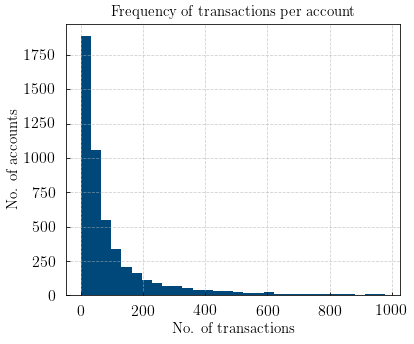

In [520]:
Unique_acNumbers = trans_df['accountNumber'].value_counts(normalize=False).values

# Make a plot 
plt.figure(figsize=(6,5))

plt.hist(Unique_acNumbers[Unique_acNumbers<1000],color=cap1_blue, bins=30)
plt.grid(ls='--',alpha=0.6)
plt.title('Frequency of transactions per account',fontsize=15)
plt.xticks(fontsize=16);plt.yticks(fontsize=16)
plt.xlabel('No. of transactions', fontsize=15);plt.ylabel('No. of accounts', fontsize=15)
plt.show()

We see that the the majority of accounts have a small number of transactions ($<100$), with a small number of accounts having many transactions ($>1000$). It is something that is good to have in mind in future investigations.

- `transactionDateTime`

In [250]:
trans_df['transactionDateTime'] = pd.to_datetime(trans_df['transactionDateTime'],infer_datetime_format=True)

### Quick summary statistics for reference.

Number of unique values at each column

In [249]:
trans_df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  3
currentBalance              487318
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

# Question: Plot

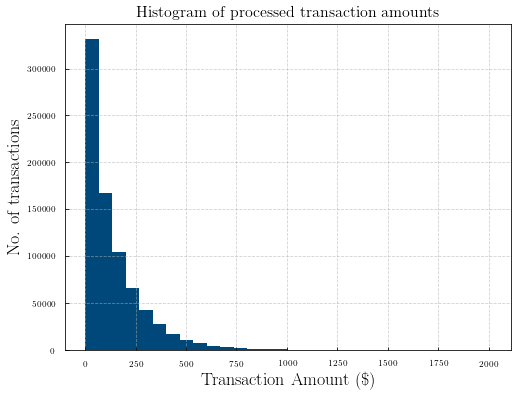

In [496]:
prossAmount = trans_df['transactionAmount'].values


plt.figure(figsize=(8,6))
plt.hist(prossAmount, color=cap1_blue, bins=30)
plt.grid(ls='--',alpha=0.6)
plt.title("Histogram of processed transaction amounts", fontsize=16)
plt.xlabel(r'Transaction Amount $(\$)$',fontsize=18);plt.ylabel('No. of transactions', fontsize=18)
plt.show()

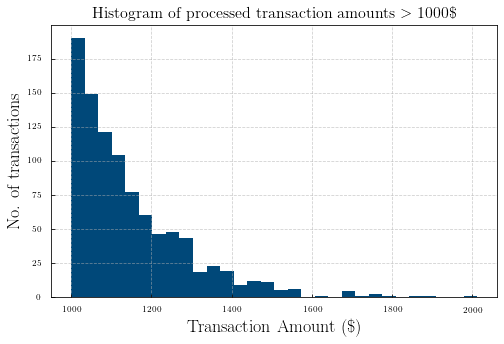

In [92]:
plt.figure(figsize=(8,5))
plt.hist(prossAmount[prossAmount>1000], color=cap1_blue, bins=30)
plt.grid(ls='--',alpha=0.6)
plt.title("Histogram of processed transaction amounts $> 1000\$ $", fontsize=16)
plt.xlabel(r'Transaction Amount $(\$)$',fontsize=18);plt.ylabel('No. of transactions', fontsize=18)
plt.show()

# Question: Data Wrangling - Duplicate Transactions

In this part we will investigate duplicate transactions that are present in the dataset. Specifically we are interested in **reversed transactions** (when a purchase is followed by a reversal) and **multi-swipe** (accidentally charging a card multiple times).  

I spent a lot of time visually investigating the dataset, trying to get a sense of when reversed and multi-swipe transactions occur (and how they are encoded in the dataset). Here are some of my findings:


- First of all, there exist duplicates that do not seem to correspond to any of the above categories. For example one of the first duplicate transactions are two purchases on Play Store ($7.47\$$ each), that do not correspond to a reversed transaction (both have a `PURCHASE` label in the `transactionType` column), neither multi-swipe (happened with a difference of over a year).

- Some times between the PURCHASE and the REVRSAL other transactions have happened. Not all reversed transactions correspond to two subsequent rows in the dataset. 

- Although all the REVERSALS that I have inspected seem to have a corresponding PURCHASE (same transaction amount, same merchant name, same account number), I am not sure that all REVERSALS correspond to reversed purchases as defined here. For example, some may correspond to a smaller amount, due to errorneous initial amount in purchase, etc. In other words, we cannot be absolutely sure that selecting the transactions with a transaction type of `REVERSAL` will give us only reversed purchases.

- For multi-swipes: from my investigation, these are duplicate transactions that follow each other (subsequent rows) and within a short period of time (e.g. < 60 seconds).

So, here I will follow the follow **strategy** to define and **find** reversed and multi-swipe transactions:

- For **reversed transaction**: Find duplicates (two `transactionAmount` entries being the same), where the first one of them has a `transactionType` of PURCHASE and the second REVERSAL, by the same `accountNumber`, same credit card (as indicated by `cardLast4Digits`) and same `merchantName`. For simplicity, check duplicates that conform to those criteria and are separated by max 50 rows. (That's to simplify and make faster the computation). 

- Compare the results of the above method with those we get assuming that all transactions with a `REVERSAL` correspond to reversed purchases. 

- For **multi-swipe** transactions: Find duplicates (same `transactionAmount`entries being the), that both of them have a `transactionType` of PURCHASE and the time difference between them is small, let's say $<60$ seconds (although we can check how the results depend on the exact number).

### Reversed Transactions

In [521]:
trans_df[0:50]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
5,830329091,830329091,5000,5000.00,2016-04-19 16:24:27,30.76,In-N-Out #422833,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
6,830329091,830329091,5000,5000.00,2016-05-21 14:50:35,57.28,Krispy Kreme #685312,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
7,830329091,830329091,5000,5000.00,2016-06-03 00:31:21,9.37,Shake Shack #968081,US,US,05,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
8,830329091,830329091,5000,4990.63,2016-06-10 01:21:46,523.67,Burger King #486122,NaN,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,9.37,True,False,False
9,830329091,830329091,5000,5000.00,2016-07-11 10:47:16,164.37,Five Guys #510989,US,US,05,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False


In [510]:
#reverals = trans_df['transactionAmount']
trans_revs = trans_df[trans_df['transactionType']=='REVERSAL']['transactionAmount']
trans_fraud = trans_df[trans_df['transactionType']=='REVERSAL']['isFraud']

In [511]:
print(len(trans_revs))

20303


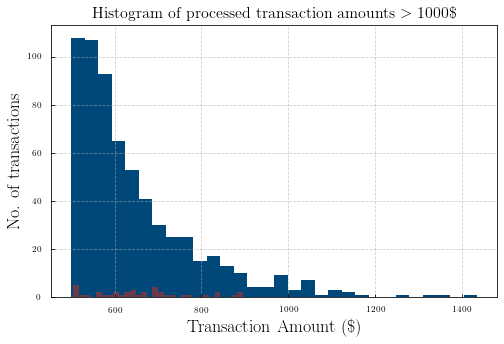

In [514]:
plt.figure(figsize=(8,5))
plt.hist(trans_revs.values[(trans_fraud==False)&(trans_revs>500)], color=cap1_blue, bins=30,density=False)
plt.hist(trans_revs.values[(trans_fraud==True)&(trans_revs>500)], color=cap1_red,alpha=0.5, bins=30,density=False)
plt.grid(ls='--',alpha=0.6)
plt.title("Histogram of processed transaction amounts $> 1000\$ $", fontsize=16)
plt.xlabel(r'Transaction Amount $(\$)$',fontsize=18);plt.ylabel('No. of transactions', fontsize=18)
plt.show()

In [453]:
trans_type = trans_df['transactionType']
summa = 0 





    
    

In [449]:
print(summa)

20714


In [477]:
differ = trans_df['transactionAmount'].diff(periods=10)
#differ_min = trans_df['transactionAmount'].diff(periods=3)
differ_card = trans_df['accountNumber'].diff(periods=10)

trans_type = trans_df['transactionType']

rev_trans = trans_df['transactionAmount'][(differ_card==0)&(differ==0)&(trans_type=='REVERSAL')]
rev_trans_fraud = trans_df['transactionAmount'][(trans_type=='REVERSAL')]

print(len(rev_trans))
print(rev_trans.sum()/1e6)

272
0.037892699999999994


In [428]:
print(trans_df[(differ_card==0)&(differ!=0)&(trans_type=='REVERSAL')])

        accountNumber  customerId  creditLimit  availableMoney  \
39          574788567   574788567         2500         2200.98   
73          574788567   574788567         2500         2432.72   
101         924729945   924729945        50000        49831.43   
133         984504651   984504651        50000        46367.41   
156         984504651   984504651        50000        41909.30   
...               ...         ...          ...             ...   
786072      288358186   288358186         7500         7367.55   
786106      899818521   899818521         2500          968.33   
786219      638498773   638498773        10000         5331.33   
786225      638498773   638498773        10000         4393.10   
786301      732852505   732852505        50000        49860.23   

       transactionDateTime  transactionAmount            merchantName  \
39     2016-05-24 01:38:03             215.13         Convenient Tire   
73     2016-10-07 10:23:57               3.87             Eaz

In [383]:
print(rev_trans_fraud.sum())

2821792.5


### Multi-Swipe

In [298]:
difftime = trans_df['transactionDateTime'].diff()

times = difftime.dt.total_seconds().values


print(len(times[(times>0)&(times<60)]))

8649


In [315]:
differ2 = trans_df['transactionAmount'].diff(2)
difftime2 = trans_df['transactionDateTime'].diff(2)

times2 = difftime2.dt.total_seconds().values

print(len(differ2[(differ2==0)&(times2>0)&(times2<100)]))

149


In [245]:


differ = datetime[615]-datetime[614]

In [246]:
print(differ.total_seconds())

3414.0


In [213]:
b = trans_df['transactionType'].values
c = trans_df['transactionType'].values

print(len(b[b=='REVERSAL']))

20303


# Question: Model

In this part we model 

### Target classes

In [152]:
# Get the target value classes (Fraud/Not Fraud)
# Convert the Boolean array (True/False) into integers (0/1) that
# A classifier can uderstand
y_target = trans_df['isFraud'].values.astype(int)

# Let's print and then plot the number of Fraudulent and non-Fraudulent transactions
n_Fraud = len(y_target[y_target==1])
n_nonFraud = len(y_target[y_target==0])

print('No. of fraudulent transactions:', n_Fraud)
print('No. of non-fraudulent transactions:', n_nonFraud)

No. of fraudulent transactions: 12417
No. of non-fraudulent transactions: 773946


Let's make a plot, to see that better

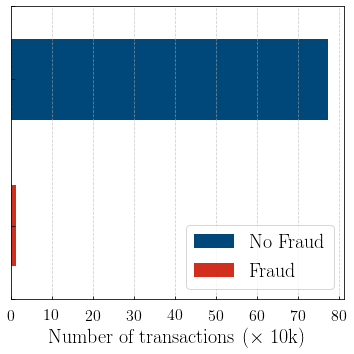

In [366]:
fig = plt.figure(figsize=(5.,5.))
plt.barh(4, n_nonFraud/10000, height=1.1, color=cap1_blue, label='No Fraud')
plt.barh(2, n_Fraud/10000, height=1.1, color=cap1_red, label='Fraud')
plt.grid(ls='--', axis='x', alpha=0.6)

plt.xticks(fontsize=16)
plt.yticks([1,2,4,5],(),fontsize=10)
plt.legend(frameon=True, loc='lower right', fontsize=20)
plt.xlabel(r'Number of transactions ($\times$ 10k)', fontsize=20)
plt.tight_layout()
plt.show()

We see that the target classes are **heavily imbalanced**, in other words we have many more non-fraudulent transactions than fraudulent ones (as expected if the dataset represents real world data).